#The Sparks Foundation

##Task-6 Prediction using Decision Tree

##Author: Smruti Bhagat

##Problem Statement: Prediction of the right class of the flower using decision tree classifier

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
from sklearn import tree
from sklearn.model_selection import train_test_split


## Analyzing the Dataset

In [2]:
#Loading the Dataset
iris_data = pd.read_csv("C:/Users/SP/OneDrive/Desktop/Spark Internship/Iris.csv")
print("Data loaded successfully")

iris_data.head(10)

Data loaded successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
#Check for null values
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
#Removal of extra data 
iris_data = iris_data.drop("Id", axis= 1)

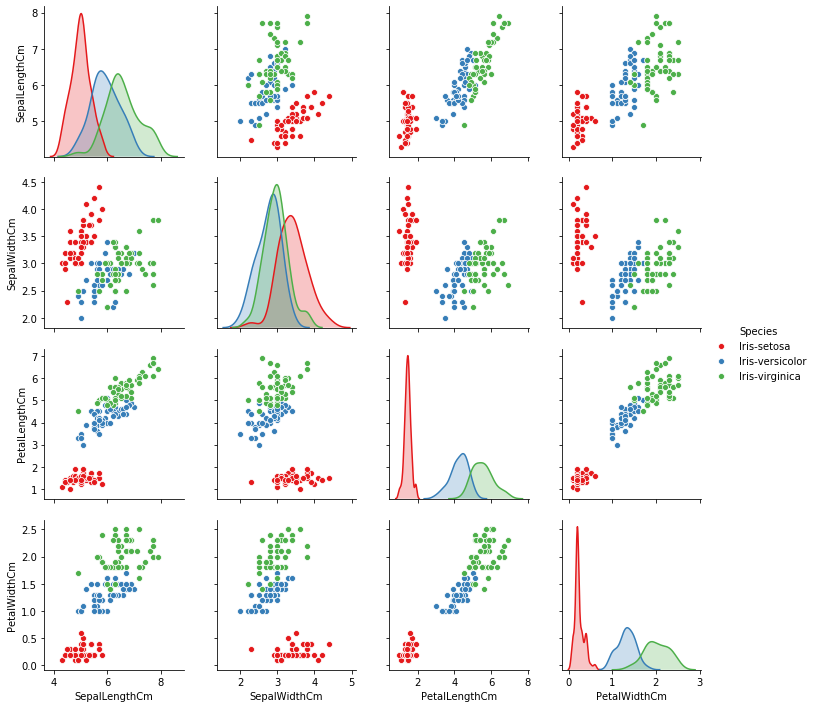

In [6]:
sns.pairplot(iris_data,hue='Species',palette='Set1')

## Data Split into Train and Test Sets

In [7]:
x = iris_data.drop('Species',axis=1)
y = iris_data['Species']
x
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1)

## Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [10]:
print(x_test)
prediction = decision_tree.predict(x_test)
prediction

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
138            6.0           3.0            4.8           1.8
77             6.7           3.0            5.0           1.7
134            6.1           2.6            5.6           1.4
0              5.1           3.5            1.4           0.2
19             5.1           3.8            1.5           0.3
45             4.8           3.0            1.4           0.3
24             4.8           3.4            1.9           0.2
20             5.4           3.4            1.7           0.2
26             5.0           3.4            1.6           0.4
137            6.4           3.1            5.5           1.8
79             5.7           2.6            3.5           1.0
76             6.8           2.8            4.8           1.4
103            6.3           2.9            5.6           1.8
11             4.8           3.4            1.6           0.2
80             5.5           2.4            3.8           1.1


array(['Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [11]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification Report Generated: ")
print(classification_report(y_test,prediction))

Classification Report Generated: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.75      0.75      0.75         4
 Iris-virginica       0.75      0.75      0.75         4

       accuracy                           0.87        15
      macro avg       0.83      0.83      0.83        15
   weighted avg       0.87      0.87      0.87        15



In [12]:
print(confusion_matrix(y_test,prediction))

[[7 0 0]
 [0 3 1]
 [0 1 3]]


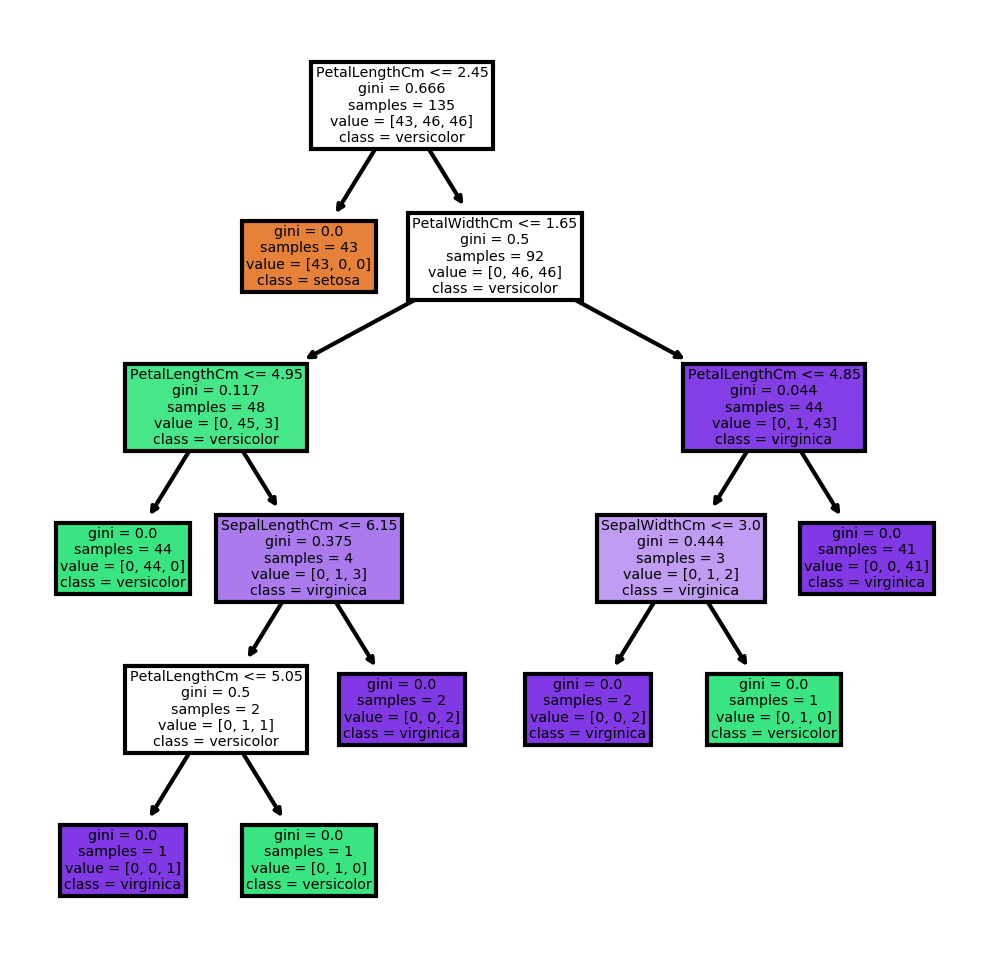

In [13]:
fn =  ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
cn = ['setosa','versicolor','virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(decision_tree,
              feature_names = fn,
              class_names = cn,
              filled = True);
fig.savefig('DecisionTree.png')


In [14]:
data = [float(num) for num in (input("Enter the values for attributes in order:Sepal_Length Sepal_Width Petal_Length Petal_Width:")).strip().split()]
predictions=decision_tree.predict([data])
print("The Category of the flower based on the entered values is:",predictions)

Enter the values for attributes in order:Sepal_Length Sepal_Width Petal_Length Petal_Width:2.3 1.2 3.4 4.5
The Category of the flower based on the entered values is: ['Iris-virginica']
